<a href="https://colab.research.google.com/github/dimaszuda/LFP_Battery_SoC_Prediction/blob/main/fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import spearmanr

In [2]:
!wget https://raw.githubusercontent.com/dimaszuda/LFP_Battery_SoC_Prediction/main/Data_Bersih.xlsx

df = pd.ExcelFile('Data_Bersih.xlsx').parse()

--2023-06-06 12:19:47--  https://raw.githubusercontent.com/dimaszuda/LFP_Battery_SoC_Prediction/main/Data_Bersih.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7499628 (7.2M) [application/octet-stream]
Saving to: ‘Data_Bersih.xlsx’

Data_Bersih.xlsx    100%[===================>]   7.15M  --.-KB/s    in 0.09s   

2023-06-06 12:19:48 (82.2 MB/s) - ‘Data_Bersih.xlsx’ saved [7499628/7499628]



In [3]:
df.head()

,CycleID,Step_Type,C_Rate,Voltage(V),Current(mA),Cap(mAh),SoC (%)
0,1,CC_Chg,0.503168,3.32923,899.479,0.00000,0.000
1,1,CC_Chg,0.503113,3.33115,899.380,0.24983,0.014
2,1,CC_Chg,0.503113,3.33414,899.380,0.49966,0.028
3,1,CC_Chg,0.503113,3.33697,899.380,0.74951,0.042
4,1,CC_Chg,0.503168,3.33905,899.479,0.99937,0.056


In [4]:
columns = ['CycleID',
           'Current(mA)',
           'Voltage(V)',
           'Cap(mAh)']

In [5]:
X_train = df[columns]
y_train = df['SoC (%)'].values.reshape(-1,1)

In [6]:
scaler = MinMaxScaler()

In [7]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=columns)

In [8]:
y_train = scaler.fit_transform(y_train)
y_train = pd.DataFrame(y_train, columns=['SoC (%)'])

In [93]:
def build_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(4)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  optimizer = tf.keras.optimizers.Adam(0.001)
  model.compile(loss='mae',
                optimizer = optimizer,
                metrics=['mse'])
  return model

In [94]:
model = build_model()

In [95]:
train = model.fit(X_train, y_train, epochs = 1400, batch_size = 1000, shuffle=False)

Epoch 1/1400
199/199 [==============================] - 1s 1ms/step - loss: 0.2245 - mse: 0.0679
Epoch 2/1400
199/199 [==============================] - 0s 2ms/step - loss: 0.1602 - mse: 0.0399
Epoch 3/1400
199/199 [==============================] - 0s 2ms/step - loss: 0.1452 - mse: 0.0427
Epoch 4/1400
199/199 [==============================] - 0s 2ms/step - loss: 0.1608 - mse: 0.0541
Epoch 5/1400
199/199 [==============================] - 0s 2ms/step - loss: 0.2154 - mse: 0.0828
Epoch 6/1400
199/199 [==============================] - 0s 2ms/step - loss: 0.1946 - mse: 0.0651
Epoch 7/1400
199/199 [==============================] - 0s 2ms/step - loss: 0.2022 - mse: 0.0662
Epoch 8/1400
199/199 [==============================] - 0s 2ms/step - loss: 0.1624 - mse: 0.0453
Epoch 9/1400
199/199 [==============================] - 0s 2ms/step - loss: 0.1680 - mse: 0.0499
Epoch 10/1400
199/199 [==============================] - 0s 1ms/step - loss: 0.1721 - mse: 0.0517
Epoch 11/1400
199/199 [======

In [96]:
def plot_history(history, title, xlabel, ylabel):
  plt.figure(figsize=(15, 6))
  plt.plot(history.history['loss'], 'r')
  plt.plot(history.history['mse'], 'b')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(['mae', 'mse'], loc='upper right')
  plt.show()
  return plt

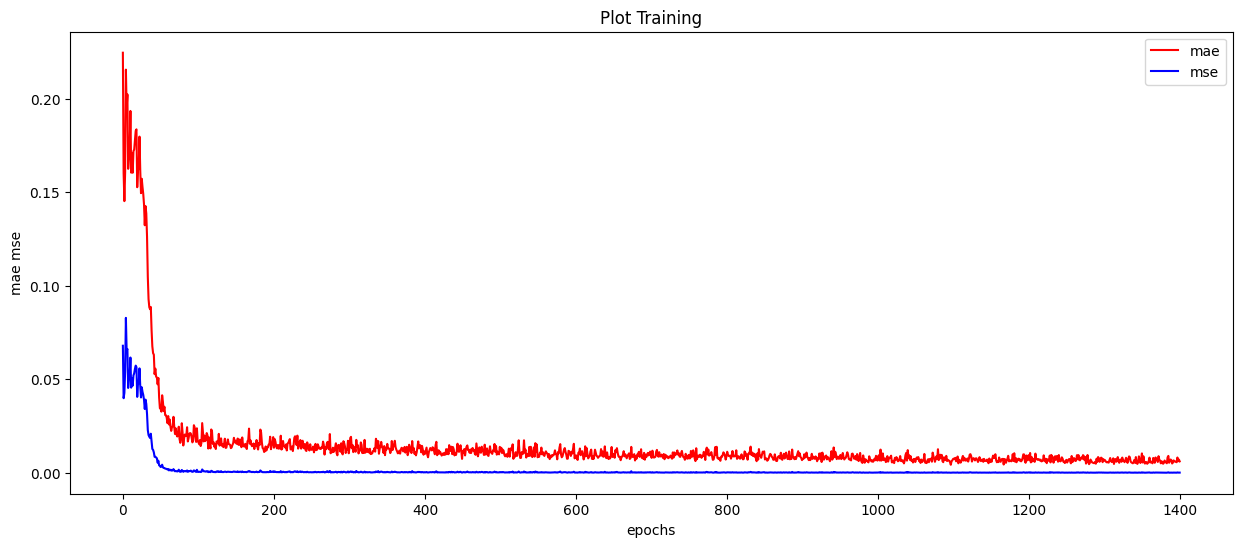

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [97]:
plot_history(train, "Plot Training", "epochs", "mae mse")

In [98]:
pred_ann = model.predict(X_train)

6219/6219 [==============================] - 5s 779us/step


In [99]:
pred_ann = scaler.inverse_transform(pred_ann)

In [100]:
actual = scaler.inverse_transform(y_train)

In [101]:
voltage = df['Voltage(V)']

In [102]:
def plot_prediksi(algorithm, voltage, judul, sb_x, sb_y):
  plt.figure(figsize=(15, 6))
  plt.scatter(algorithm, voltage, c='r')
  plt.title(judul)
  plt.xlabel(sb_x)
  plt.ylabel(sb_y)
  plt.show()
  return plt

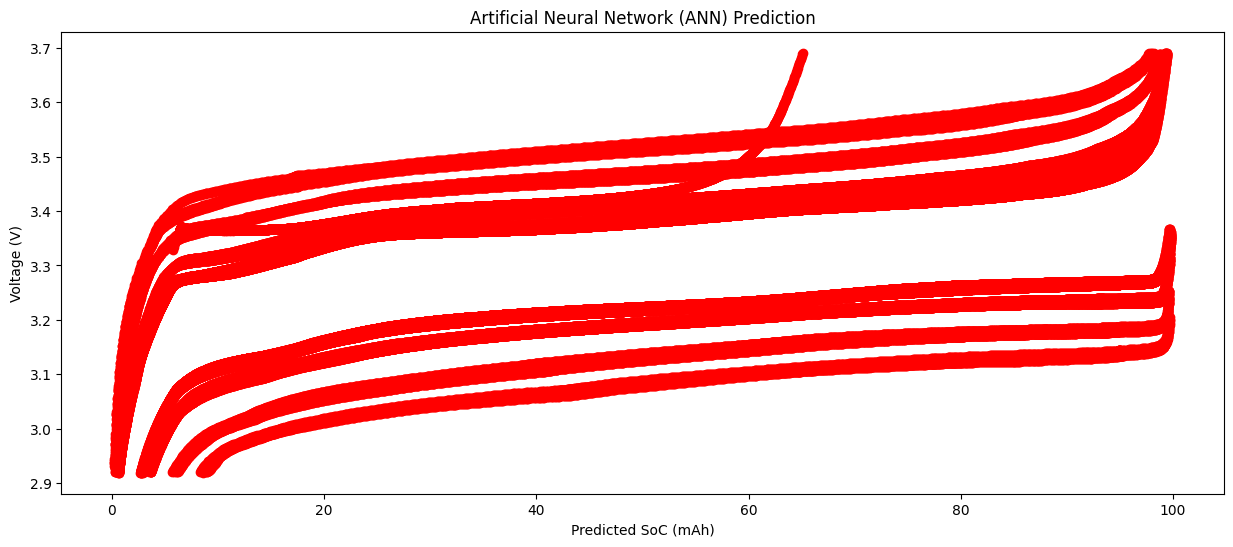

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [103]:
plot_prediksi(pred_ann, voltage, "Artificial Neural Network (ANN) Prediction", "Predicted SoC (mAh)", "Voltage (V)")

In [104]:
error = mae(y_train, pred_ann)
error2 = mse(y_train, pred_ann)
corr, _ = spearmanr(y_train, pred_ann)

In [105]:
print(error)
print(error2)
print(corr)

49.47470569440148
3214.9761747867
0.9988663955807262


In [106]:
def compare(actual, predicted, title, sb_x, sb_y):
  fig, ax = plt.subplots(figsize=(8, 4))
  plt.style.use('default')
  plt.style.use('ggplot')
  ax.plot(actual, predicted, color='k', label='actual')
  ax.scatter(actual, predicted, edgecolor='r', facecolor='grey', alpha=0.7, label='predicted')
  ax.set_ylabel(sb_y)
  ax.set_xlabel(sb_x)
  ax.legend(facecolor='white', fontsize=11)
  ax.set_title(title)
  fig.tight_layout()
  plt.show()